In [53]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

import os
import numpy as np
import pandas as pd

In [2]:
OUTDIR = '/mnt/ws/home/mstone/scRNA-network-inference-comparison/notebooks/manuscript_draft/fig6_bulk_comparison'
if not os.path.exists(OUTDIR):
    os.mkdir(OUTDIR)
    
WORKDIR = '/mnt/ws/home/mstone/scRNA-network-inference-comparison/'
os.chdir(WORKDIR)

PermissionError: [Errno 13] Permission denied: '/mnt/ws/home/mstone/scRNA-network-inference-comparison/notebooks/manuscript_draft/fig6_bulk_comparison'

In [54]:
OUTDIR = '/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/Final_figures/figure_panels_Jan11'
if not os.path.exists(OUTDIR):
    os.mkdir(OUTDIR)
    
WORKDIR = '/mnt/dv/wid/projects5/Roy-singlecell/scRNAseq_NetInference/'
os.chdir(WORKDIR)

In [30]:
import yaml
config = yaml.load(open('/mnt/home/mstone/scRNA-network-inference-comparison/snakefiles/notebooks.yaml'),
                   Loader=yaml.FullLoader)

ALGORITHMS = config['algorithms']
ALG_FIX = config['algorithm_namefix']

PermissionError: [Errno 13] Permission denied: '/mnt/home/mstone/scRNA-network-inference-comparison/snakefiles/notebooks.yaml'

In [55]:
ALGORITHMS = ['Pearson', 'SCENIC', 'MERLIN','PIDC', 'LEAP', 'SCODE','Scribe', 'SILGGM', 'Inferelator', 'kNN-DREMI']


In [56]:
ALG_FIX = {
    'inferelator': 'Inferelator',
    'knnDREMI': 'kNN-DREMI',
    'pearson': 'Pearson',
    'random': 'Random'
}

ALGORITHMS = [ALG_FIX.get(a, a) for a in ALGORITHMS]
alg_fix = {
    'inferelator': 'Inferelator',
    'knnDREMI': 'kNN-DREMI',
    'pearson': 'Pearson',
    'random': 'Random'
}

ALGORITHMS = [alg_fix.get(a, a) for a in ALGORITHMS]

### Load scores

In [57]:
DATADIR = '/mnt/dv/wid/projects5/Roy-singlecell/netinf_algo_comparison/results/compare2bulk'
idx_cols = 'dataset GS_src algorithm'.split()

names = 'dataset GS_src algorithm n_edges precision recall fscore'.split()
fscores = pd.read_table(os.path.join(DATADIR, 'all_fscores_5k.txt'), names=names).set_index(idx_cols).drop('n_edges', axis=1)

names = 'dataset GS_src algorithm AUPR'.split()
aupr = pd.read_table(os.path.join(DATADIR, 'all_auprs.txt'), names=names).set_index(idx_cols)

names = 'dataset GS_src algorithm n_edges n_TFs'.split()
predTF = pd.read_table(os.path.join(DATADIR, 'all_ptfs_5k.txt'), names=names).set_index(idx_cols).drop('n_edges', axis=1)

scores = pd.concat([fscores, aupr, predTF], axis=1).reset_index()
scores.algorithm = scores.algorithm.replace(ALG_FIX)

### Clean up

- Assign bulk/single-cell label
- Restrict to Gasch for comparison
- Label-friendly GS names
- Melt to tidy

In [58]:
scores['method'] = scores.algorithm.apply(lambda s: 'Bulk' if s.endswith('bulk') else 'Single-cell')

In [59]:
DATASETS = 'gasch_GSE102475 sridharan_A2S han_GSE107552'.split()

In [60]:
scores = scores.loc[scores.dataset.isin(DATASETS)].copy()
scores = scores.loc[(scores.method == 'Single-cell') |
                    (scores.dataset.str.startswith('gasch') & scores.algorithm.str.endswith('g_bulk')) |
                    (~scores.dataset.str.startswith('gasch') & scores.algorithm.str.endswith('_bulk'))].copy()

# and renanme the three primary gold standards
scores.GS_src = scores.GS_src.replace({'KDUnion': 'Perturb', 
                                       'chipunion': 'ChIP',
                                       'chipunion_KDUnion_intersect': 'Perturb+ChIP'})

In [61]:
BULK_ALG_FIX = {
    'corr_g_bulk': 'Corr',
    'g3_g_bulk': 'GENIE3',
    'larsen_g_bulk': 'LARSEN',
    'merlin_g_bulk': 'MERLIN',
    'pgg_g_bulk': 'PGG',
    'tigress_g_bulk': 'TIGRESS',
    'corr_bulk': 'Corr',
    'g3_bulk': 'GENIE3',
    'larsen_bulk': 'LARSEN',
    'merlin_bulk': 'MERLIN',
    'pgg_bulk': 'PGG',
    'tigress_bulk': 'TIGRESS'
}

scores.algorithm = scores.algorithm.replace(BULK_ALG_FIX)

In [62]:
scores.algorithm.value_counts()

MERLIN         18
LEAP            9
TIGRESS         9
Random          9
Pearson         9
kNN-DREMI       9
Inferelator     9
GENIE3          9
Corr            9
Scribe          9
SILGGM          9
SCODE           9
SCENIC          9
PIDC            9
rand_bulk       6
LARSEN          3
PGG             3
Name: algorithm, dtype: int64

In [63]:
scores = pd.melt(scores, 
                 id_vars=['dataset', 'algorithm', 'GS_src', 'method'],
                 value_vars=['fscore', 'AUPR', 'n_TFs'],
                 var_name='metric',
                 value_name='score')

In [64]:
scores

,dataset,algorithm,GS_src,method,metric,score
0,gasch_GSE102475,LEAP,Perturb,Single-cell,fscore,0.0357
1,gasch_GSE102475,MERLIN,Perturb,Single-cell,fscore,0.0253
2,gasch_GSE102475,PIDC,Perturb,Single-cell,fscore,0.0234
3,gasch_GSE102475,SCENIC,Perturb,Single-cell,fscore,0.0395
4,gasch_GSE102475,SCODE,Perturb,Single-cell,fscore,0.0456
...,...,...,...,...,...,...
436,sridharan_A2S,MERLIN,Perturb+ChIP,Bulk,n_TFs,3.0000
437,sridharan_A2S,Pearson,Perturb+ChIP,Single-cell,n_TFs,0.0000
438,sridharan_A2S,rand_bulk,Perturb+ChIP,Bulk,n_TFs,0.0000
439,sridharan_A2S,Random,Perturb+ChIP,Single-cell,n_TFs,0.0000


### Add comparison to random

In [65]:
rand_scores = scores.loc[scores.algorithm == 'Random'].rename(columns={'score': 'random'})

In [66]:
rand_scores = scores.loc[scores.algorithm == 'Random'].rename(columns={'score': 'random'})

scores = pd.merge(scores, rand_scores.drop(['algorithm', 'method'], axis=1),
                  on=['dataset', 'GS_src', 'metric'],
                  how='left')

scores['rand_ratio'] = scores['score'] / scores['random']
scores['log_rand_ratio'] = np.log2(scores['rand_ratio'])

In [67]:
scores = scores.loc[scores.algorithm != 'Random'].copy()
scores = scores.loc[scores.algorithm != 'rand_bulk'].copy()

## Figure

In [68]:
MARKERS = 'o v ^ < > s p P * x X D d'.split()

In [69]:
from matplotlib import patches

In [46]:
ALGORITHMS = [a for a in ALGORITHMS if a != 'Random']

In [70]:
ALGORITHMS

['Pearson',
 'SCENIC',
 'MERLIN',
 'PIDC',
 'LEAP',
 'SCODE',
 'Scribe',
 'SILGGM',
 'Inferelator',
 'kNN-DREMI']

In [71]:
MARKER_KEY = {alg: m for alg, m in zip(ALGORITHMS, MARKERS)}
COLOR_KEY = {alg: c for alg, c in zip(ALGORITHMS, sns.color_palette('colorblind'))}

In [73]:
fscores

precision  recall  \
dataset         GS_src                      algorithm                           
gasch_GSE102475 chipunion_KDUnion_intersect corr_bszc_bulk     0.0444  0.1290   
                                            corr_ch_bulk       0.0278  0.0808   
                                            corr_g_bulk        0.0386  0.1121   
                                            g3_bszc_bulk       0.0506  0.1470   
                                            g3_ch_bulk         0.0372  0.1081   
...                                                               ...     ...   
zhao_GSE114952  KDUnion                     SCENIC             0.2098  0.0422   
                                            SCODE              0.1146  0.0231   
                                            Scribe             0.1222  0.0246   
                                            SILGGM             0.2390  0.0481   
                                            tigress_bulk       0.1560  0.0314   

                                                            fscore  
dataset         GS_src                      algorithm               
gasch_GSE102475 chipunion_KDUnion_intersect corr_bszc_bulk  0.0661  
                                            corr_ch_bulk    0.0414  
                                            corr_g_bulk     0.0574  
                                            g3_bszc_bulk    0.0753  
                                            g3_ch_bulk      0.0553  
...                                                            ...  
zhao_GSE114952  KDUnion                     SCENIC          0.0703  
                                            SCODE           0.0384  
                                            Scribe          0.0409  
                                            SILGGM          0.0801  
                                            tigress_bulk    0.0523  

[363 rows x 3 columns]

In [76]:
# Rename gold standards
cell_types = 'yeast mESC mDC hESC'.split()
def clean_GS_src(GS_src):
    data = GS_src.split("_")
    if data[0] in cell_types:
        return '_'.join(data[1:])
    else:
        return '_'.join(data)
    
# Strip cell type labels from gold standard names
fscores.GS_src = fscores.GS_src.apply(clean_GS_src)

# and renanme the three primary gold standards
fscores.GS_src = fscores.GS_src.replace({'KDUnion': 'Perturb', 
                                       'chipunion': 'ChIP',
                                       'chipunion_KDUnion_intersect': 'Perturb+ChIP'})

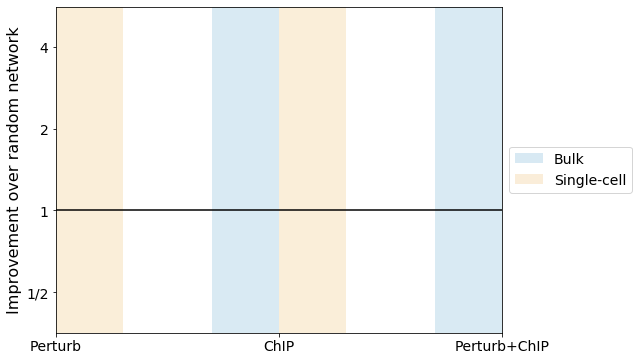

In [78]:
GS_LIST = ['Perturb', 'ChIP', 'Perturb+ChIP']

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
np.random.seed(149)

offset = 0.15
bg_bar_width = 0.3
jitter = 0.05

scatter_params = {'s': 100, 'linewidths': 1, 'edgecolor': 'k'}

for i, GS_src in enumerate(GS_LIST):
    #fscores['GS_src'] = fscores.index.get_level_values('GS_src')
    for idx, row in fscores.loc[fscores.GS_src == GS_src].iterrows():
        if row.method == 'Single-cell':
            ax.scatter(i + offset + jitter * np.random.uniform(-1, 1), row.log_rand_ratio,
                       color=COLOR_KEY[row.algorithm], marker=MARKER_KEY[row.algorithm],
                       label=row.algorithm if i == 0 else None,
                       **scatter_params)
        else:
            ax.scatter(i - offset + jitter * np.random.uniform(-1, 1), row.log_rand_ratio,
                       **scatter_params)
    
    for j, method in enumerate(['Bulk', 'Single-cell']):
        if method == 'Single-cell':
            x = i + offset
        else:
            x = i - offset
            
        rect = patches.Rectangle((x - (bg_bar_width / 2), -2), 
                                 bg_bar_width, 5, 
                                 linewidth=0, edgecolor=None, 
                                 alpha=0.15,
                                 facecolor=sns.color_palette('colorblind')[j], 
                                 label=method if i == 0 else None)
        ax.add_patch(rect)
            
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(GS_LIST)

ax.axhline(0, c='k')
ax.set_yticks(np.arange(-2, 3, 1))
ax.set_yticklabels(['1/4', '1/2', '1', '2', '4'])
ax.set_ylim(-1.5, 2.5)
ax.set_ylabel('Improvement over random network')

ax.legend(loc='center left', 
          bbox_to_anchor=(1, 0.5), bbox_transform=ax.transAxes)



In [23]:
BULK_ALGORITHMS = sorted(scores.loc[scores.method == 'Bulk', 'algorithm'].unique())

In [24]:
BULK_ALGORITHMS.pop(0)
BULK_ALGORITHMS += ['Corr']
BULK_ALGORITHMS

['GENIE3', 'LARSEN', 'MERLIN', 'PGG', 'TIGRESS', 'Corr']

In [25]:
BULK_MARKER_KEY = {alg: m for alg, m in zip(BULK_ALGORITHMS, MARKERS)}
BULK_COLOR_KEY = {alg: c for alg, c in zip(BULK_ALGORITHMS, sns.color_palette('colorblind'))}

In [26]:
plt.rcParams['figure.titlesize'] = 18
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

## V1 with background bars

AttributeError: 'DataFrame' object has no attribute 'GS_src'

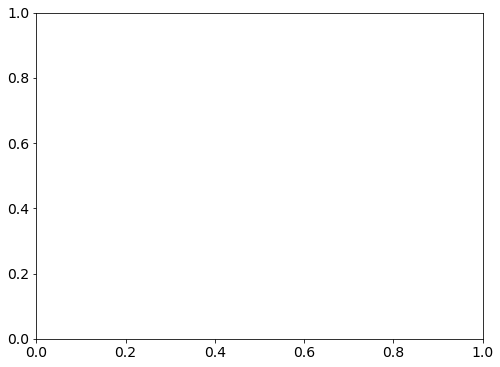

In [27]:
GS_LIST = ['Perturb', 'ChIP', 'Both']

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
np.random.seed(149)

offset = 0.15
bg_bar_width = 0.3
jitter = 0.05

scatter_params = {'s': 100, 'linewidths': 1, 'edgecolor': 'k'}

for i, GS_src in enumerate(GS_LIST):
    for idx, row in fscores.loc[fscores.GS_src == GS_src].iterrows():
        if row.method == 'Single-cell':
            ax.scatter(i + offset + jitter * np.random.uniform(-1, 1), row.log_rand_ratio,
                       color=COLOR_KEY[row.algorithm], marker=MARKER_KEY[row.algorithm],
                       **scatter_params)
        else:
            ax.scatter(i - offset + jitter * np.random.uniform(-1, 1), row.log_rand_ratio,
                      color=BULK_COLOR_KEY[row.algorithm], marker=BULK_MARKER_KEY[row.algorithm],
                       **scatter_params)
    
    for j, method in enumerate(['Bulk', 'Single-cell']):
        if method == 'Single-cell':
            x = i + offset
        else:
            x = i - offset
            
        rect = patches.Rectangle((x - (bg_bar_width / 2), -2), 
                                 bg_bar_width, 5, 
                                 linewidth=0, edgecolor=None, 
                                 alpha=0.15,
                                 facecolor=sns.color_palette('colorblind')[j])
        ax.add_patch(rect)
            
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(GS_LIST)

ax.axhline(0, c='k')
ax.set_yticks(np.arange(-2, 3, 1))
ax.set_yticklabels(['1/4', '1/2', '1', '2', '4'], fontsize=14)
ax.set_ylim(-1.5, 2.5)
ax.set_ylabel('Improvement over random network', fontsize=16)
ax.set_xlabel('Gold standard')
ax.set_title('F-score')


bulk_patches = [plt.plot([],[], label=alg,
                       marker=BULK_MARKER_KEY[alg], color=BULK_COLOR_KEY[alg],
                       ms=14, ls="", mec=None)[0] for alg in BULK_ALGORITHMS] 

l = fig.legend(handles=bulk_patches, 
               prop=dict(size=16), ncol=1,
               loc='center left', title='Bulk', 
               frameon=True,
               facecolor=sns.color_palette('colorblind')[0], framealpha=0.15,
               bbox_to_anchor=(0.91, 0.5), bbox_transform=fig.transFigure)
l.get_title().set_fontsize(18)
l.get_frame().set_linewidth(2)
l.get_frame().set_edgecolor('k')


sc_patches = [plt.plot([],[], label=alg,
                       marker=MARKER_KEY[alg], color=COLOR_KEY[alg],
                       ms=14, ls="", mec=None)[0] for alg in ALGORITHMS] 

l = fig.legend(handles=sc_patches, 
               prop=dict(size=16), ncol=1,
               loc='center left', title='Single-cell', 
               frameon=True,
               facecolor=sns.color_palette('colorblind')[1], framealpha=0.15,
               bbox_to_anchor=(1.15, 0.5), bbox_transform=fig.transFigure)
l.get_title().set_fontsize(18)
l.get_frame().set_linewidth(2)
l.get_frame().set_edgecolor('k')

In [275]:
        summary = fscores.loc[(fscores.GS_src == GS_src) & 
                              (fscores.method == method), 'log_rand_ratio'].describe()

In [276]:
summary

count    10.000000
mean      0.339671
std       0.327547
min      -0.343074
25%       0.165910
50%       0.353955
75%       0.503778
max       0.793109
Name: log_rand_ratio, dtype: float64

In [277]:
summary['50%']

0.35395536824547696

AttributeError: 'DataFrame' object has no attribute 'method'

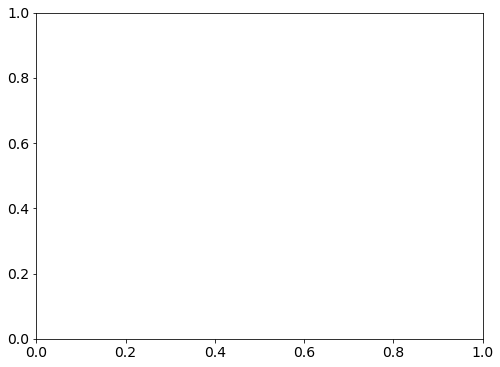

In [79]:
GS_LIST = ['Perturb', 'ChIP', 'Perturb']

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
np.random.seed(149)

offset = 0.15
bg_bar_width = 0.3
jitter = 0.05

scatter_params = {'s': 100, 'linewidths': 1, 'edgecolor': 'k'}

for i, GS_src in enumerate(GS_LIST):
    for idx, row in fscores.loc[fscores.GS_src == GS_src].iterrows():
        if row.method == 'Single-cell':
            ax.scatter(i + offset + jitter * np.random.uniform(-1, 1), row.log_rand_ratio,
                       color=COLOR_KEY[row.algorithm], marker=MARKER_KEY[row.algorithm],
                       **scatter_params)
        else:
            ax.scatter(i - offset + jitter * np.random.uniform(-1, 1), row.log_rand_ratio,
                      color=BULK_COLOR_KEY[row.algorithm], marker=BULK_MARKER_KEY[row.algorithm],
                       **scatter_params)
    
    for j, method in enumerate(['Bulk', 'Single-cell']):
        if method == 'Single-cell':
            x = i + offset
        else:
            x = i - offset
            
        rect = patches.Rectangle((x - (bg_bar_width / 2), -2), 
                                 bg_bar_width, 5, 
                                 linewidth=0, edgecolor=None, 
                                 alpha=0.15,
                                 facecolor=sns.color_palette('colorblind')[j])
        ax.add_patch(rect)
        
        summary = fscores.loc[(fscores.GS_src == GS_src) & 
                              (fscores.method == method), 'log_rand_ratio'].describe()
        ax.plot((x - offset, x + offset), (summary['50%'], summary['50%']),
                c=sns.color_palette('colorblind')[j], linewidth=3, zorder=0)
#         ax.plot((x - offset, x + offset), (summary['25%'], summary['25%']),
#                 linestyle=':',
#                 c=sns.color_palette('colorblind')[j], linewidth=2, zorder=0)
#         ax.plot((x - offset, x + offset), (summary['75%'], summary['75%']),
#                 linestyle=':',
#                 c=sns.color_palette('colorblind')[j], linewidth=2, zorder=0)
            
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(GS_LIST)

ax.axhline(0, c='k')
ax.set_yticks(np.arange(-2, 3, 1))
ax.set_yticklabels(['1/4', '1/2', '1', '2', '4'], fontsize=14)
ax.set_ylim(-1.5, 2.5)
ax.set_ylabel('Improvement over random network', fontsize=16)
ax.set_xlabel('Gold standard')
ax.set_title('F-score')


bulk_patches = [plt.plot([],[], label=alg,
                       marker=BULK_MARKER_KEY[alg], color=BULK_COLOR_KEY[alg],
                       ms=14, ls="", mec=None)[0] for alg in BULK_ALGORITHMS] 

l = fig.legend(handles=bulk_patches, 
               prop=dict(size=16), ncol=1,
               loc='center left', title='Bulk', 
               frameon=True,
               facecolor=sns.color_palette('colorblind')[0], framealpha=0.15,
               bbox_to_anchor=(0.91, 0.5), bbox_transform=fig.transFigure)
l.get_title().set_fontsize(18)
l.get_frame().set_linewidth(2)
l.get_frame().set_edgecolor('k')


sc_patches = [plt.plot([],[], label=alg,
                       marker=MARKER_KEY[alg], color=COLOR_KEY[alg],
                       ms=14, ls="", mec=None)[0] for alg in ALGORITHMS] 

l = fig.legend(handles=sc_patches, 
               prop=dict(size=16), ncol=1,
               loc='center left', title='Single-cell', 
               frameon=True,
               facecolor=sns.color_palette('colorblind')[1], framealpha=0.15,
               bbox_to_anchor=(1.15, 0.5), bbox_transform=fig.transFigure)
l.get_title().set_fontsize(18)
l.get_frame().set_linewidth(2)
l.get_frame().set_edgecolor('k')

In [292]:
scores.head()

,dataset,algorithm,GS_src,method,metric,score,random,rand_ratio,log_rand_ratio
0,gasch_GSE102475,LEAP,Perturb,Single-cell,fscore,0.0357,0.0145,2.462069,1.299871
1,gasch_GSE102475,MERLIN,Perturb,Single-cell,fscore,0.0253,0.0145,1.744828,0.803084
2,gasch_GSE102475,PIDC,Perturb,Single-cell,fscore,0.0234,0.0145,1.613793,0.690456
3,gasch_GSE102475,SCENIC,Perturb,Single-cell,fscore,0.0395,0.0145,2.724138,1.445800
4,gasch_GSE102475,SCODE,Perturb,Single-cell,fscore,0.0456,0.0145,3.144828,1.652981


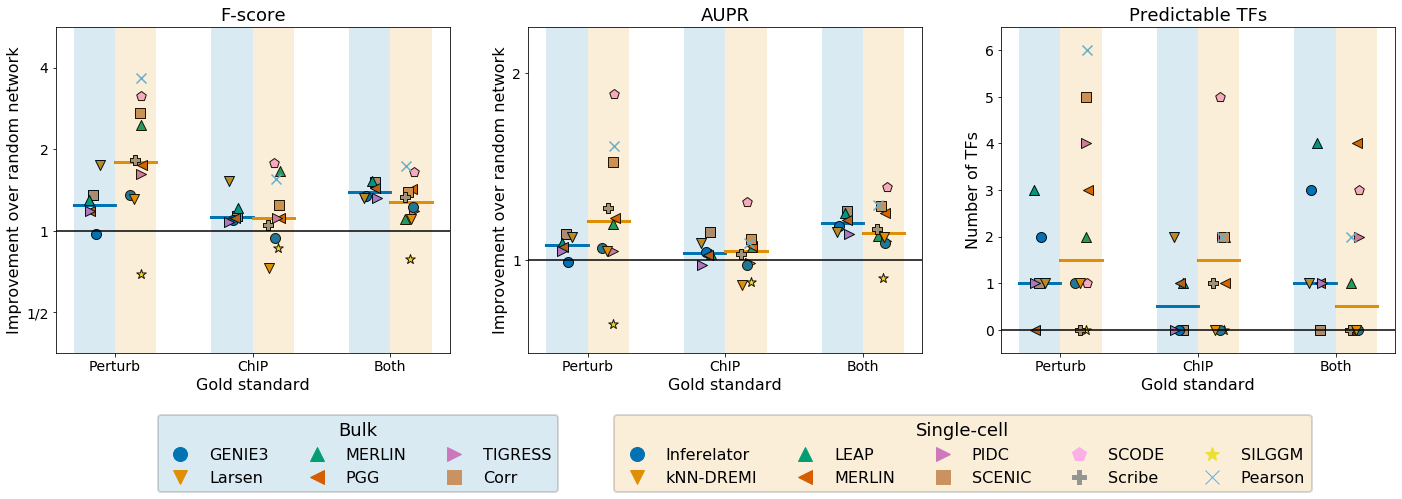

In [308]:
METRICS = ['fscore', 'AUPR', 'n_TFs']
GS_LIST = ['Perturb', 'ChIP', 'Both']

fig, axes = plt.subplots(1, 3, figsize=(24, 6))

offset = 0.15
bg_bar_width = 0.3
jitter = 0.05

scatter_params = {'s': 100, 'linewidths': 1, 'edgecolor': 'k'}

for ax, metric in zip(axes, METRICS):
    np.random.seed(149)
    
    if metric == 'n_TFs':
        score_col = 'score'
    else:
        score_col = 'log_rand_ratio'
    
    dat = scores.loc[scores.metric == metric]
    for i, GS_src in enumerate(GS_LIST):
        for idx, row in dat.loc[dat.GS_src == GS_src].iterrows():
            if row.method == 'Single-cell':
                ax.scatter(i + offset + jitter * np.random.uniform(-1, 1), row[score_col],
                           color=COLOR_KEY[row.algorithm], marker=MARKER_KEY[row.algorithm],
                           **scatter_params)
            else:
                ax.scatter(i - offset + jitter * np.random.uniform(-1, 1), row[score_col],
                          color=BULK_COLOR_KEY[row.algorithm], marker=BULK_MARKER_KEY[row.algorithm],
                           **scatter_params)

        for j, method in enumerate(['Bulk', 'Single-cell']):
            if method == 'Single-cell':
                x = i + offset
            else:
                x = i - offset

            rect = patches.Rectangle((x - (bg_bar_width / 2), -2), 
                                     bg_bar_width, 9, 
                                     linewidth=0, edgecolor=None, 
                                     alpha=0.15,
                                     facecolor=sns.color_palette('colorblind')[j])
            ax.add_patch(rect)

            summary = dat.loc[(dat.GS_src == GS_src) & 
                                 (dat.method == method), score_col].describe()
            ax.plot((x - offset, x + offset), (summary['50%'], summary['50%']),
                    c=sns.color_palette('colorblind')[j], linewidth=3, zorder=0)

    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(GS_LIST)

    ax.axhline(0, c='k')
    ax.set_xlabel('Gold standard')
    
    if metric == 'fscore':
        ax.set_title('F-score')
        ax.set_yticks(np.arange(-2, 3, 1))
        ax.set_yticklabels(['1/4', '1/2', '1', '2', '4'], fontsize=14)
        ax.set_ylim(-1.5, 2.5)
    elif metric == 'n_TFs':
        ax.set_title('Predictable TFs')
        ax.set_yticks(np.arange(7))
        ax.set_ylim(-0.5, 6.5)
    else:
        ax.set_title('AUPR')
        ax.set_yticks(np.arange(0, 2, 1))
        ax.set_yticklabels(['1', '2', '4'], fontsize=14)
        ax.set_ylim(-0.5, 1.25)
        
    if metric == 'n_TFs':
        ax.set_ylabel('Number of TFs')
    else:
        ax.set_ylabel('Improvement over random network', fontsize=16)


bulk_patches = [plt.plot([],[], label=alg,
                       marker=BULK_MARKER_KEY[alg], color=BULK_COLOR_KEY[alg],
                       ms=14, ls="", mec=None)[0] for alg in BULK_ALGORITHMS] 

l = fig.legend(handles=bulk_patches, 
               prop=dict(size=16), ncol=3,
               loc='upper center', title='Bulk', 
               frameon=True,
               facecolor=sns.color_palette('colorblind')[0], framealpha=0.15,
               bbox_to_anchor=(0.3, 0), bbox_transform=fig.transFigure)
l.get_title().set_fontsize(18)
l.get_frame().set_linewidth(2)
l.get_frame().set_edgecolor('k')


sc_patches = [plt.plot([],[], label=alg,
                       marker=MARKER_KEY[alg], color=COLOR_KEY[alg],
                       ms=14, ls="", mec=None)[0] for alg in ALGORITHMS] 

l = fig.legend(handles=sc_patches, 
               prop=dict(size=16), ncol=5,
               loc='upper center', title='Single-cell', 
               frameon=True,
               facecolor=sns.color_palette('colorblind')[1], framealpha=0.15,
               bbox_to_anchor=(0.65, 0), bbox_transform=fig.transFigure)
l.get_title().set_fontsize(18)
l.get_frame().set_linewidth(2)
l.get_frame().set_edgecolor('k')

## Three datasets

In [352]:
def format_did(dataset):
    """Convert dataset ID to axis title"""
    
    dname, geo = dataset.split('_')
    
    if dname == 'sridharan':
        return 'Tran ({0})'.format(geo)
    else:
        return dname.capitalize()

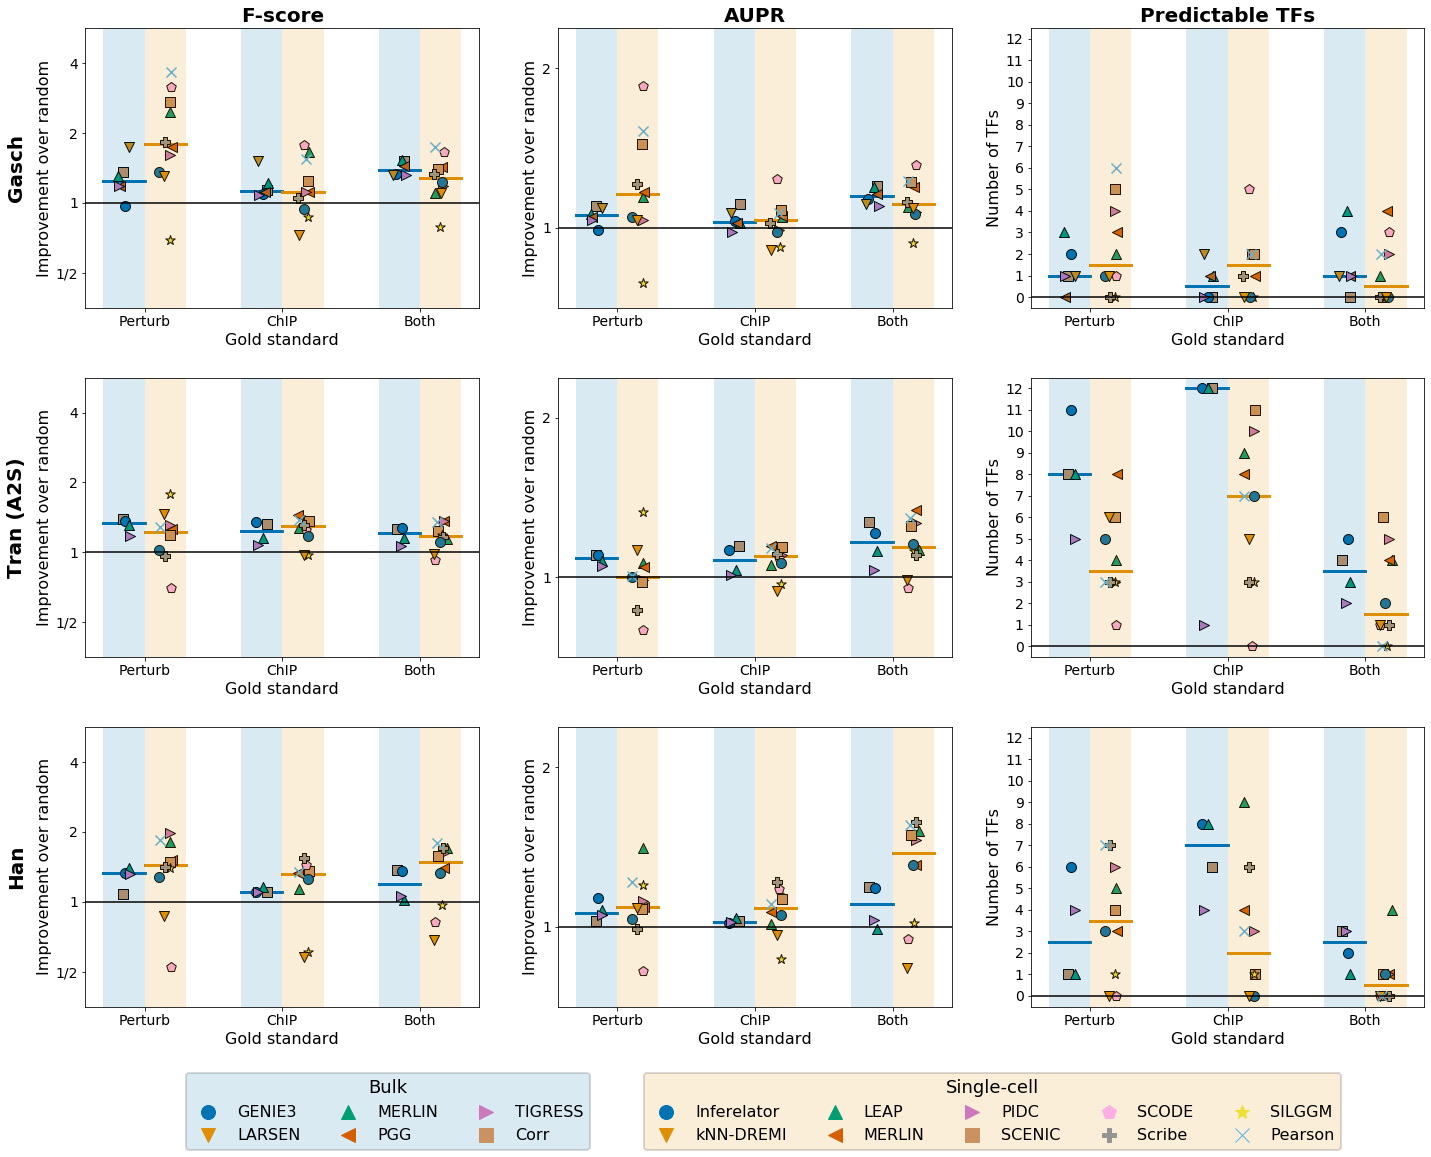

In [363]:
METRICS = ['fscore', 'AUPR', 'n_TFs']
GS_LIST = ['Perturb', 'ChIP', 'Both']

fig, axes = plt.subplots(3, 3, figsize=(24, 18))

offset = 0.15
bg_bar_width = 0.3
jitter = 0.05

scatter_params = {'s': 100, 'linewidths': 1, 'edgecolor': 'k'}

for axrow, dataset in zip(axes, DATASETS):
    for ax, metric in zip(axrow, METRICS):
        np.random.seed(149)

        if metric == 'n_TFs':
            score_col = 'score'
        else:
            score_col = 'log_rand_ratio'

        dat = scores.loc[(scores.metric == metric) & (scores.dataset == dataset)]
        for i, GS_src in enumerate(GS_LIST):
            for idx, row in dat.loc[dat.GS_src == GS_src].iterrows():
                if row.method == 'Single-cell':
                    ax.scatter(i + offset + jitter * np.random.uniform(-1, 1), row[score_col],
                               color=COLOR_KEY[row.algorithm], marker=MARKER_KEY[row.algorithm],
                               **scatter_params)
                else:
                    ax.scatter(i - offset + jitter * np.random.uniform(-1, 1), row[score_col],
                              color=BULK_COLOR_KEY[row.algorithm], marker=BULK_MARKER_KEY[row.algorithm],
                               **scatter_params)

            for j, method in enumerate(['Bulk', 'Single-cell']):
                if method == 'Single-cell':
                    x = i + offset
                else:
                    x = i - offset

                rect = patches.Rectangle((x - (bg_bar_width / 2), -2), 
                                         bg_bar_width, 15, 
                                         linewidth=0, edgecolor=None, 
                                         alpha=0.15,
                                         facecolor=sns.color_palette('colorblind')[j])
                ax.add_patch(rect)

                summary = dat.loc[(dat.GS_src == GS_src) & 
                                     (dat.method == method), score_col].describe()
                ax.plot((x - offset, x + offset), (summary['50%'], summary['50%']),
                        c=sns.color_palette('colorblind')[j], linewidth=3, zorder=0)

        ax.set_xticks([0, 1, 2])
        ax.set_xticklabels(GS_LIST)

        ax.axhline(0, c='k')
        ax.set_xlabel('Gold standard')

        if metric == 'fscore':
            if dataset.startswith('gasch'):
                ax.set_title('F-score', fontsize=20, fontweight='bold')
            ax.set_yticks(np.arange(-2, 3, 1))
            ax.set_yticklabels(['1/4', '1/2', '1', '2', '4'], fontsize=14)
            ax.set_ylim(-1.5, 2.5)
        elif metric == 'n_TFs':
#             if dataset.startswith('gasch'):
#                 ymax = 7
#             elif dataset.startswith('sridharan_A2S'):
#                 ymax = 13
#             elif dataset.startswith('han'):
#                 ymax = 10
            ymax = 13
            if dataset.startswith('gasch'):
                ax.set_title('Predictable TFs', fontsize=20, fontweight='bold')
            ax.set_yticks(np.arange(ymax))
            ax.set_ylim(-0.5, ymax - 0.5)
        elif metric == 'AUPR':
            if dataset.startswith('gasch'):
                ax.set_title('AUPR', fontsize=20, fontweight='bold')
            ax.set_yticks(np.arange(0, 2, 1))
            ax.set_yticklabels(['1', '2', '4'], fontsize=14)
            ax.set_ylim(-0.5, 1.25)

        if metric == 'n_TFs':
            ax.set_ylabel('Number of TFs')
        else:
            ax.set_ylabel('Improvement over random', fontsize=16)
            
        if metric == 'fscore':
            ax.text(-0.15, 0.5, format_did(dataset), 
                    rotation=90, ha='right', va='center',
                    transform=ax.transAxes,
                    fontsize=20, fontweight='bold')


bulk_patches = [plt.plot([],[], label=alg,
                       marker=BULK_MARKER_KEY[alg], color=BULK_COLOR_KEY[alg],
                       ms=14, ls="", mec=None)[0] for alg in BULK_ALGORITHMS] 

l = fig.legend(handles=bulk_patches, 
               prop=dict(size=16), ncol=3,
               loc='upper center', title='Bulk', 
               frameon=True,
               facecolor=sns.color_palette('colorblind')[0], framealpha=0.15,
               bbox_to_anchor=(0.3, 0.08), bbox_transform=fig.transFigure)
l.get_title().set_fontsize(18)
l.get_frame().set_linewidth(2)
l.get_frame().set_edgecolor('k')


sc_patches = [plt.plot([],[], label=alg,
                       marker=MARKER_KEY[alg], color=COLOR_KEY[alg],
                       ms=14, ls="", mec=None)[0] for alg in ALGORITHMS] 

l = fig.legend(handles=sc_patches, 
               prop=dict(size=16), ncol=5,
               loc='upper center', title='Single-cell', 
               frameon=True,
               facecolor=sns.color_palette('colorblind')[1], framealpha=0.15,
               bbox_to_anchor=(0.65, 0.08), bbox_transform=fig.transFigure)
l.get_title().set_fontsize(18)
l.get_frame().set_linewidth(2)
l.get_frame().set_edgecolor('k')

plt.subplots_adjust(hspace=0.25)

plt.savefig(os.path.join(OUTDIR, 'fig6_main.pdf'), bbox_inches='tight')

In [364]:
OUTDIR

'/mnt/ws/home/mstone/scRNA-network-inference-comparison/notebooks/manuscript_draft/fig6_bulk_comparison'

## V1 with boxes

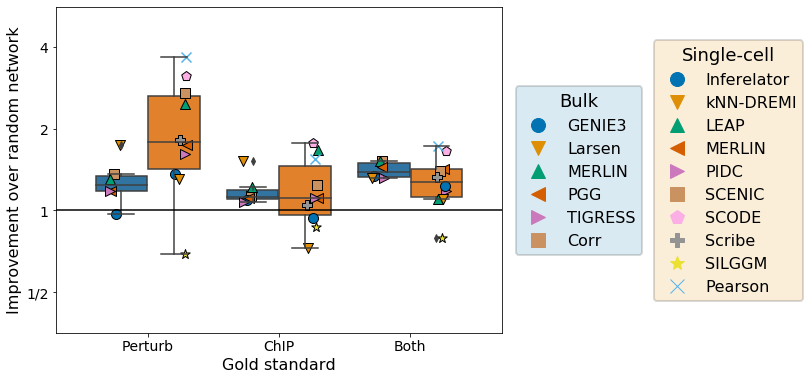

In [267]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(data=fscores,
              x='GS_src', y='log_rand_ratio',
              hue='method', hue_order=['Bulk', 'Single-cell'])

np.random.seed(149)

offset = 0.25
bg_bar_width = 0.3
jitter = 0.05

for i, GS_src in enumerate(GS_LIST):
    for idx, row in fscores.loc[fscores.GS_src == GS_src].iterrows():
        if row.method == 'Single-cell':
            ax.scatter(i + offset + jitter * np.random.uniform(-1, 1), row.log_rand_ratio,
                       color=COLOR_KEY[row.algorithm], marker=MARKER_KEY[row.algorithm],
                       **scatter_params)
        else:
            ax.scatter(i - offset + jitter * np.random.uniform(-1, 1), row.log_rand_ratio,
                      color=BULK_COLOR_KEY[row.algorithm], marker=BULK_MARKER_KEY[row.algorithm],
                       **scatter_params)
            
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(GS_LIST)

ax.axhline(0, c='k')
ax.set_yticks(np.arange(-2, 3, 1))
ax.set_yticklabels(['1/4', '1/2', '1', '2', '4'])
ax.set_ylim(-1.5, 2.5)
ax.set_ylabel('Improvement over random network')
ax.set_xlabel('Gold standard')

ax.get_legend().remove()

bulk_patches = [plt.plot([],[], label=alg,
                       marker=BULK_MARKER_KEY[alg], color=BULK_COLOR_KEY[alg],
                       ms=14, ls="", mec=None)[0] for alg in BULK_ALGORITHMS] 

l = fig.legend(handles=bulk_patches, 
               prop=dict(size=16), ncol=1,
               loc='center left', title='Bulk', 
               frameon=True,
               facecolor=sns.color_palette('colorblind')[0], framealpha=0.15,
               bbox_to_anchor=(0.91, 0.5), bbox_transform=fig.transFigure)
l.get_title().set_fontsize(18)
l.get_frame().set_linewidth(2)
l.get_frame().set_edgecolor('k')


sc_patches = [plt.plot([],[], label=alg,
                       marker=MARKER_KEY[alg], color=COLOR_KEY[alg],
                       ms=14, ls="", mec=None)[0] for alg in ALGORITHMS] 

l = fig.legend(handles=sc_patches, 
               prop=dict(size=16), ncol=1,
               loc='center left', title='Single-cell', 
               frameon=True,
               facecolor=sns.color_palette('colorblind')[1], framealpha=0.15,
               bbox_to_anchor=(1.15, 0.5), bbox_transform=fig.transFigure)
l.get_title().set_fontsize(18)
l.get_frame().set_linewidth(2)
l.get_frame().set_edgecolor('k')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.boxplot(data=fscores,
              x='GS_src', y='log_rand_ratio',
              hue='method', hue_order=['Bulk', 'Single-cell'])



In [128]:
help(sns.boxplot)

Help on function boxplot in module seaborn.categorical:

boxplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, notch=False, ax=None, **kwargs)
    Draw a box plot to show distributions with respect to categories.
    
    A box plot (or box-and-whisker plot) shows the distribution of quantitative
    data in a way that facilitates comparisons between variables or across
    levels of a categorical variable. The box shows the quartiles of the
    dataset while the whiskers extend to show the rest of the distribution,
    except for points that are determined to be "outliers" using a method
    that is a function of the inter-quartile range.
    
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``

In [28]:
fscores.sort_values(['GS_src', 'method'])

,dataset,GS_src,algorithm,n_edges,precision,recall,fscore,method
62,gasch_GSE102475,KDUnion,corr_g_bulk,5000,0.0384,0.0133,0.0197,Bulk
65,gasch_GSE102475,KDUnion,g3_g_bulk,5000,0.0274,0.0095,0.0141,Bulk
70,gasch_GSE102475,KDUnion,larsen_g_bulk,5000,0.0492,0.0170,0.0253,Bulk
74,gasch_GSE102475,KDUnion,merlin_g_bulk,5000,0.0368,0.0127,0.0189,Bulk
79,gasch_GSE102475,KDUnion,pgg_g_bulk,5000,0.0334,0.0115,0.0171,Bulk
89,gasch_GSE102475,KDUnion,tigress_g_bulk,5000,0.0334,0.0115,0.0171,Bulk
66,gasch_GSE102475,KDUnion,inferelator,5000,0.0384,0.0133,0.0197,Single-cell
67,gasch_GSE102475,KDUnion,knnDREMI,5000,0.0370,0.0128,0.0190,Single-cell
71,gasch_GSE102475,KDUnion,LEAP,5000,0.0696,0.0240,0.0357,Single-cell
75,gasch_GSE102475,KDUnion,MERLIN,5000,0.0492,0.0170,0.0253,Single-cell


In [23]:
fscores.loc[fscores.algorithm == 'merlin_g_bulk']

,dataset,GS_src,algorithm,n_edges,precision,recall,fscore,method
14,gasch_GSE102475,chipunion_KDUnion_intersect,merlin_g_bulk,5000,0.0388,0.1127,0.0577,Bulk
44,gasch_GSE102475,chipunion,merlin_g_bulk,5000,0.0514,0.0221,0.0309,Bulk
74,gasch_GSE102475,KDUnion,merlin_g_bulk,5000,0.0368,0.0127,0.0189,Bulk
104,jackson_GSE125162,chipunion_KDUnion_intersect,merlin_g_bulk,5000,0.0358,0.0692,0.0472,Bulk
133,jackson_GSE125162,chipunion,merlin_g_bulk,5000,0.0524,0.0112,0.0184,Bulk
162,jackson_GSE125162,KDUnion,merlin_g_bulk,5000,0.0350,0.0069,0.0115,Bulk


In [21]:
fscores.algorithm.value_counts()

SCODE                18
SCENIC               18
MERLIN               18
random               18
LEAP                 18
SILGGM               18
pearson              18
knnDREMI             18
rand_bulk            18
inferelator          15
Scribe               15
PIDC                 15
g3_bulk              12
merlin_bulk          12
corr_bulk            12
tigress_bulk         12
pgg_ch_bulk           6
g3_g_bulk             6
corr_bszc_bulk        6
pgg_bszc_bulk         6
merlin_ch_bulk        6
larsen_ch_bulk        6
corr_ch_bulk          6
merlin_bszc_bulk      6
tigress_bszc_bulk     6
g3_bszc_bulk          6
corr_g_bulk           6
tigress_g_bulk        6
g3_ch_bulk            6
larsen_bszc_bulk      6
tigress_ch_bulk       6
larsen_g_bulk         6
merlin_g_bulk         6
pgg_g_bulk            6
Name: algorithm, dtype: int64